In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [6]:
data = pd.read_csv('/content/Black Friday Sales.csv')

In [7]:
print(data.head())

   User_ID Product_ID Gender    Age  Occupation City_Category  \
0  1000004  P00128942      M  46-50           7             B   
1  1000009  P00113442      M  26-35          17             C   
2  1000010  P00288442      F  36-45           1             B   
3  1000010  P00145342      F  36-45           1             B   
4  1000011  P00053842      F  26-35           1             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               1                   1   
1                          0               0                   3   
2                         4+               1                   5   
3                         4+               1                   4   
4                          1               0                   4   

   Product_Category_2  Product_Category_3  
0                11.0                 NaN  
1                 5.0                 NaN  
2                14.0                 NaN  
3                 9.0   

In [8]:
print(data.tail())

        User_ID Product_ID Gender    Age  Occupation City_Category  \
233594  1006036  P00118942      F  26-35          15             B   
233595  1006036  P00254642      F  26-35          15             B   
233596  1006036  P00031842      F  26-35          15             B   
233597  1006037  P00124742      F  46-50           1             C   
233598  1006039  P00316642      F  46-50           0             B   

       Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
233594                         4+               1                   8   
233595                         4+               1                   5   
233596                         4+               1                   1   
233597                         4+               0                  10   
233598                         4+               1                   4   

        Product_Category_2  Product_Category_3  
233594                 NaN                 NaN  
233595                 8.0                

In [9]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB
None


In [10]:
print(data.describe())

            User_ID     Occupation  Marital_Status  Product_Category_1  \
count  2.335990e+05  233599.000000   233599.000000       233599.000000   
mean   1.003029e+06       8.085407        0.410070            5.276542   
std    1.726505e+03       6.521146        0.491847            3.736380   
min    1.000001e+06       0.000000        0.000000            1.000000   
25%    1.001527e+06       2.000000        0.000000            1.000000   
50%    1.003070e+06       7.000000        0.000000            5.000000   
75%    1.004477e+06      14.000000        1.000000            8.000000   
max    1.006040e+06      20.000000        1.000000           18.000000   

       Product_Category_2  Product_Category_3  
count       161255.000000        71037.000000  
mean             9.849586           12.669454  
std              5.094943            4.125944  
min              2.000000            3.000000  
25%              5.000000            9.000000  
50%              9.000000           14.000000

In [11]:
print(data.isnull())

        User_ID  Product_ID  Gender    Age  Occupation  City_Category  \
0         False       False   False  False       False          False   
1         False       False   False  False       False          False   
2         False       False   False  False       False          False   
3         False       False   False  False       False          False   
4         False       False   False  False       False          False   
...         ...         ...     ...    ...         ...            ...   
233594    False       False   False  False       False          False   
233595    False       False   False  False       False          False   
233596    False       False   False  False       False          False   
233597    False       False   False  False       False          False   
233598    False       False   False  False       False          False   

        Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                            False           Fals

In [12]:
print(data.isnull().sum())

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64


In [13]:
# Convert categorical variables to numerical
encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])  # Male=1, Female=0
data['Age'] = encoder.fit_transform(data['Age'])
data['City_Category'] = encoder.fit_transform(data['City_Category'])
data['Stay_In_Current_City_Years'] = encoder.fit_transform(data['Stay_In_Current_City_Years'])


In [14]:
# Dropping unnecessary columns
data.drop(['User_ID', 'Product_ID'], axis=1, inplace=True)

Training a Machine Learning Model


In [22]:
# Removing rows with missing values in 'y'
data_cleaned = data.dropna(subset=['Product_Category_3'])
X = data_cleaned.drop(columns=['Product_Category_3'])
y = data_cleaned['Product_Category_3']


In [23]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=52)

In [24]:
# Defining Features (X) and Target(y)
X = data.drop(columns=['Product_Category_2'])  # Features
y = data['Product_Category_2']  # Target variable

In [16]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=52)

In [25]:
# Featuring Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
#Training a Random Forest Regression Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=52)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=52)

In [27]:
# Predicting
y_pred = rf_model.predict(X_test)

In [28]:
# Evaluating the Model Performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Score: {r2}")

Mean Absolute Error: 2.386135473437729
Mean Squared Error: 10.922934269780724
Root Mean Squared Error: 3.304986273765857
R2 Score: 0.3524443860076756


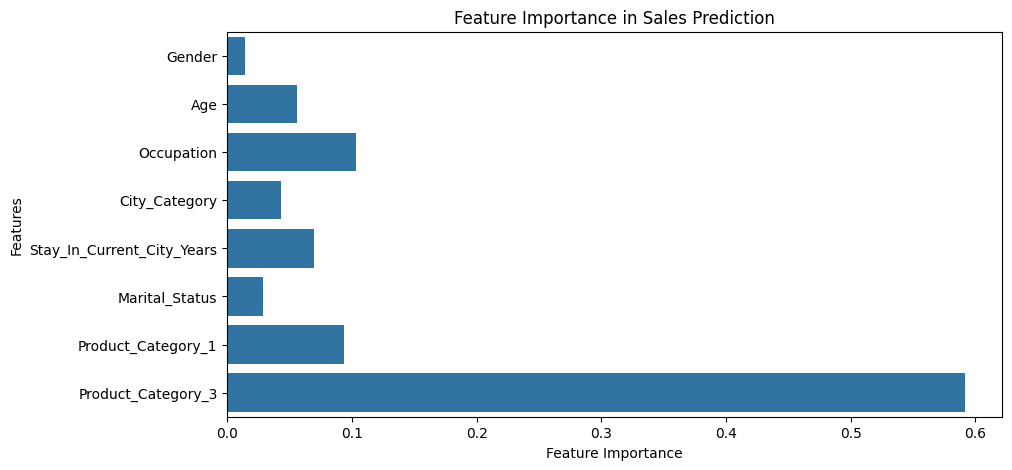

In [31]:
# Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Featuring Importance
plt.figure(figsize=(10,5))
importance = model.feature_importances_
sns.barplot(x=importance, y=X.columns)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Sales Prediction")
plt.show()